In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.misc import derivative
import ast

In [186]:
from sklearn.datasets import *
from sklearn.preprocessing import minmax_scale

In [208]:
X0,Y0 = make_blobs(n_samples = 500,n_features=2,centers=2,random_state=75,cluster_std = 5)
X0 = minmax_scale(X0)
k = int(len(X0)*0.6)

In [209]:
X,Y = X0[0:k,:],Y0[0:k]
Xt,Yt = X0[k:,:],Y0[k:]
params = len(X[0])

In [210]:
params

2

In [211]:
#theta = np.random.normal(0,1,size = params+1)
xmat = np.hstack([np.ones(len(X)).reshape(-1,1), X])

In [212]:
def hfunc(mat):
    return 1 / (1 + np.exp(-mat))

In [213]:
class loss_f:
    def __init__(self,params):
        self.params = params
    def create_loss(self):
        upper = "def hiddenf("
        for i in range(self.params):
            upper += "xin" + str(i)
            if i < self.params -1 :
                upper += ","
        upper += "):return -np.mean((Y*np.log(hfunc(np.dot(xmat,np.array(["
        for i in range(self.params):
            upper += "xin" + str(i)
            if i < self.params -1 :
                upper += ","
                
        upper += "])))))+((1-Y)*np.log(1 - np.log(hfunc(np.dot(xmat,np.array(["
        
        for i in range(self.params):
            upper += "xin" + str(i)
            if i < self.params -1 :
                upper += ","
        upper += "])))))))"
        #print (upper)
        exec(upper,globals())
        return hiddenf

In [214]:
lf = loss_f(params+1)
MSE = lf.create_loss()

def partial_derivative(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(*args)
    return derivative(wraps, point[var], dx = 1e-6)

def update(lossv,theta):
    theta = list(theta)
    W = []
    for i in range(len(theta)):
        W.append(partial_derivative(lossv,i,theta))
    return np.array(W)

In [215]:
def MVGrad(theta,J,C = 0.005):
    step_size = J * C
    return theta - step_size

In [216]:
from tqdm import tqdm

In [217]:
def valid_f(theta):
    vxm = np.hstack([np.ones(len(Xv)).reshape(-1,1), Xv])
    R = np.dot(vxm,theta)
    return -np.mean(
        (Yv*np.log(hfunc(R))) + ((1 - Yv)*(1 - np.log(hfunc(R))))
    )

In [218]:
theta = np.random.normal(0,1,size = params+1)
xmat = np.hstack([np.ones(len(X)).reshape(-1,1), X])

#print (theta)
err = []
for i in tqdm(range(10000)):
    J = update(MSE,theta)
    theta = MVGrad(theta,J,C = 0.1)
    err.append(MSE(*theta))

100%|██████████| 10000/10000 [00:05<00:00, 1874.43it/s]


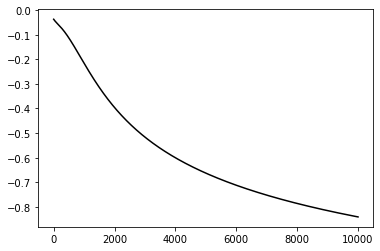

In [219]:
plt.plot(err, c = 'k')

In [220]:
theta

array([-14.90755085,   7.61560145,  21.21281998])

In [221]:
newX = np.hstack([np.ones(len(Xt)).reshape(-1,1), Xt])

In [222]:
P = hfunc(np.dot(newX,theta))

In [223]:
from sklearn.metrics import roc_auc_score

In [224]:
roc_auc_score(Yt,P)

0.993030303030303

In [225]:
def linear_disc(x1,theta):
    return (-theta[1]*x1 + (-theta[0]))/(theta[2])

In [226]:
g = np.linspace(0,1,10)
gp = linear_disc(g,theta)

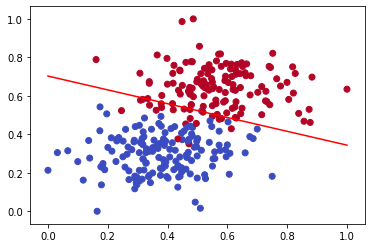

In [227]:
plt.scatter(xmat[:,1],xmat[:,2], c = Y, cmap = "coolwarm")
plt.plot(g,gp, c = 'red')

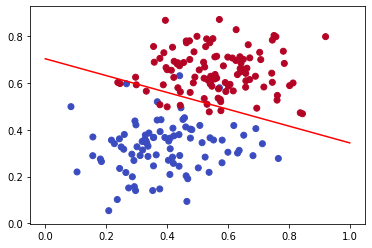

In [228]:
plt.scatter(newX[:,1],newX[:,2], c = Yt, cmap = "coolwarm")
plt.plot(g,gp, c = 'red')